## Проверка статистической связанности. Критерий хи-квадрат

In [2]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols


%matplotlib inline

**Задача.** Перед вами результаты медицинских исследований. Из 1500 мужчин, испытывающих лекарство, выздоровели 700, из 210 не принимавших выздоровели 80. Из 220 принимавших женщин — 150, из 680 не принимавших — 300. Проверить, влияет ли лекарство на мужчин? На женщин? На людей обоих полов?

Запишем аккуратно данные. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 700 | 800 |
|$\overline{A}$| 80 | 130 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 150 | 70 |
|$\overline{A}$| 300 | 280 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 850 | 870 |
|$\overline{A}$| 380 | 410 |

</td></tr> </table>

In [3]:
# перепишем данные 

men = np.array([[700,800],[80,130]])
women = np.array([[150,70],[300,280]])
both = men + women

### Есть ли эффект от лекарства у мужчин? 

Заметим, что среди принимавших лекарство мужчин доля выздоровевших больше, чем среди мужчин, не принимавших лекарство:

$$\frac{700}{700 + 800} \approx 0.467 \qquad > \qquad 0.381 \approx \frac{80}{80 + 130}.$$
  
Проверим, значимо ли это различие.

In [4]:
# можно реализовать криетрий вручную 

n = np.sum(men) # количество испытуемых
n1,n2 = np.sum(men,axis=1) # количество испытуемых, принимавших и не принимавших лекарство
p = np.sum(men,axis=0)/n # вероятности попасть в (B) и (not B)
exmen = np.array([p*n1,p*n2]) # ожидаемые количества в каждой ячейке

statistic = np.sum((men - exmen)**2/exmen)
pvalue = 1-stats.chi2.cdf(statistic, df=1)

print("statistic = ", statistic)
print("p-value = ", pvalue)

statistic =  5.455512229705774
p-value =  0.019506684444057898


In [5]:
# второй спобоб реализации 

stats.chi2_contingency(men, correction=False)

(5.455512229705774,
 0.019506684444057915,
 1,
 array([[684.21052632, 815.78947368],
        [ 95.78947368, 114.21052632]]))

Критерий хи-квадрат признал различие значимым на уровне $\approx 2\%$.

### Есть ли эффект от лекарства у женщин? 

Аналогично, среди принимавших лекарство женщин доля выздоровевших больше, чем среди женщин, не принимавших лекарство:

$$\frac{150}{150 + 70} \approx 0.682 \qquad > \qquad 0.517 \approx \frac{300}{300 + 280}.$$
  
Проверим, значимо ли это различие.

In [6]:
stats.chi2_contingency(women)

(16.89247151316117,
 3.9558168423442364e-05,
 1,
 array([[123.75,  96.25],
        [326.25, 253.75]]))

### Есть ли эффект от лекарства у мужчин и женщин вместе? 

Как это ни странно, из таблицы с объединенными результатами следует, что доля выздоровевших больше среди тех людей, которые лекарство **не принимали**:

$$\frac{850}{850+870} \approx 0.494 \qquad > \qquad 0.481 \approx \frac{380}{380+410}.$$
  
Проверим, значимо ли это различие.

In [7]:
stats.chi2_contingency(both)

(0.32506536675320896,
 0.5685793289091471,
 1,
 array([[842.8685259, 877.1314741],
        [387.1314741, 402.8685259]]))

Зависимости не обнаружено

### Причина парадокса

Причины несогласованности выводов — большие отличия в размерах групп пациентов, принимающих плацебо и препарат: основной вклад в выводы вносят женщины, принимавшие плацебо, и мужчины, принимавшие препарат.
Чтобы такого не происходило, плацебо и препарат должны поровну распределяться по всем анализируемым подгруппам.

Г. Секей пишет: «Аналогично, новое лекарство может оказаться эффективным в каждом из десяти различных госпиталей, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно».

Кроме того, число мужчин (210), не принимавших лекарство, недостаточно велико: согласно таблице, приведенной в книге
Дж. Флейс «Статистические методы для изучения таблиц долей и пропорций», вероятность ошибки II рода, для таких данных
равна $50\%$. Чтобы обеспечить ошибку второго рода $10\%$, необходимо иметь не менее 475 пациентов в этой категории.

Этот пример показывает, что к выводам, основанным на применении критерия хи-квадрат, следует относиться с осторожностью.

### Образование и вера

2008 General Social Survey, National Opinion Research center (Agresti A. Categorical Data Analysis. — Hoboken: John Wiley & Sons, 2013, табл. 3.2)

General Social Survey — ежегодный опрос населения США, записывается около 5000 факторов. Из опроса 2008 года выбраны данные о вере и образовании 2000 опрошенных. Есть ли связь между степенью веры и уровнем образования?

In [8]:
data = pd.read_csv('data/fe.txt', sep = '\t')
data.head()


,Highest degree,don’t believe,no way to find out,some higher power,believe sometimes,believe but doubts,know God exists
0,Less than high school,9,8,27,8,47,236
1,High school or junior college,23,39,88,49,179,706
2,Bachelor or graduate,28,48,89,19,104,293


In [9]:
values = data.values[:, 1:].astype(float)
values

array([[  9.,   8.,  27.,   8.,  47., 236.],
       [ 23.,  39.,  88.,  49., 179., 706.],
       [ 28.,  48.,  89.,  19., 104., 293.]])

In [10]:
stats.chi2_contingency(values)


(76.1483261658133,
 2.842572791195739e-12,
 10,
 array([[ 10.05  ,  15.9125,  34.17  ,  12.73  ,  55.275 , 206.8625],
        [ 32.52  ,  51.49  , 110.568 ,  41.192 , 178.86  , 669.37  ],
        [ 17.43  ,  27.5975,  59.262 ,  22.078 ,  95.865 , 358.7675]]))

# ANOVA

<img src="data/fish.png" alt="Drawing" style="width: 700px;"/>


<img src="data/lim.png" alt="Drawing" style="width: 700px;"/>

FYI : критерий Краскела-Уоллеса, критерий Джонкхиера

## Рост певцов хора

Cleveland W. S. (1993) Visualizing Data. Summit, New Jersey: Hobart Press.

В 1979 году было опрошено 235 членов нью-йоркской ассоциации хорового пения, для каждого из них известен рост и регистр голоса. Меняется ли средний рост вместе с регистром?

In [11]:
data =  sm.datasets.get_rdataset('singer', 'lattice').data
data.head()

,height,voice.part
0,64,Soprano 1
1,62,Soprano 1
2,66,Soprano 1
3,65,Soprano 1
4,60,Soprano 1


In [12]:
data.columns = ['height', 'voice']
data['height'] *= 2.54

In [13]:
data.describe()


,height
count,235.000000
mean,170.936596
std,9.714908
min,152.400000
25%,165.100000
50%,170.180000
75%,177.800000
max,193.040000


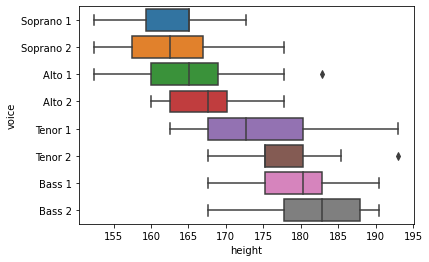

In [14]:
_ = sns.boxplot(x='height', y='voice', data=data)
plt.show()

In [15]:
lm = ols('height ~ C(voice)', data=data).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(voice),7.0,12911.303982,1844.471997,45.641891,5.617050e-40
Residual,227.0,9173.483695,40.411822,NaN,NaN


In [16]:
values = data.groupby('voice')['height'].apply(list).reset_index()['height'].tolist()

In [19]:
stats.f_oneway(*values)

F_onewayResult(statistic=45.6418910588508, pvalue=5.617049546739561e-40)

In [20]:
data.groupby('voice').mean()

,height
voice,
Alto 1,164.809714
Alto 2,167.734074
Bass 1,179.623590
Bass 2,181.316923
Soprano 1,163.195000
Soprano 2,162.475333
Tenor 1,175.018095
Tenor 2,177.558095


<img src="data/bart.png" alt="Drawing" style="width: 700px;"/>

FYI: Тест левина не накладывает жестких ограничений на нормальность
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [21]:
stats.bartlett(*data.groupby('voice').groups.values())

BartlettResult(statistic=18.417706445737398, pvalue=0.010221018996479406)

<img src="data/tukey.png" alt="Drawing" style="width: 700px;"/>

FYI: критерий Шеффе, LSD Фишера, критерий Неменьи

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data['height'],
 groups=data['voice'],
 alpha= 0.05 )


In [24]:
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
   Alto 1    Alto 2   2.9244 0.6235  -2.0573    7.906  False
   Alto 1    Bass 1  14.8139   -0.0  10.2855  19.3423   True
   Alto 1    Bass 2  16.5072   -0.0  11.4717  21.5427   True
   Alto 1 Soprano 1  -1.6147 0.9623  -6.2315   3.0021  False
   Alto 1 Soprano 2  -2.3344 0.8195  -7.1734   2.5046  False
   Alto 1   Tenor 1  10.2084    0.0     4.84  15.5768   True
   Alto 1   Tenor 2  12.7484    0.0     7.38  18.1168   True
   Alto 2    Bass 1  11.8895    0.0   7.0204  16.7587   True
   Alto 2    Bass 2  13.5828    0.0   8.2389  18.9268   True
   Alto 2 Soprano 1  -4.5391  0.099  -9.4905   0.4124  False
   Alto 2 Soprano 2  -5.2587 0.0422  -10.418  -0.0995   True
   Alto 2   Tenor 1    7.284 0.0027   1.6252  12.9428   True
   Alto 2   Tenor 2    9.824    0.0   4.1652  15.4828   True
   Bass 1    Bass 2   1.